In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten
# from sklearn.model_slection import train_test_split -----not useful because mnist provide train test data seperately
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
# Normalize pixel values
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
#using one hot encoding labeling
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [5]:
model=Sequential([Flatten(input_shape=(28, 28)),
                  Dense(64,activation='relu'),
                  Dense(32,activation='relu'),
                  Dense(10,activation='softmax')
                 ])

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
print("y_train shape:", y_train.shape)
print("Model output shape:", model.output_shape)

y_train shape: (60000, 10)
Model output shape: (None, 10)


In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
hist=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8370 - loss: 0.5580 - val_accuracy: 0.9647 - val_loss: 0.1355
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9553 - loss: 0.1518 - val_accuracy: 0.9650 - val_loss: 0.1211
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9677 - loss: 0.1049 - val_accuracy: 0.9695 - val_loss: 0.0987
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0777 - val_accuracy: 0.9752 - val_loss: 0.0923
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0679 - val_accuracy: 0.9747 - val_loss: 0.0889
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0566 - val_accuracy: 0.9718 - val_loss: 0.1016
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9758 - val_loss: 0.0890
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0454 - 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0976
Test accuracy: 0.9741


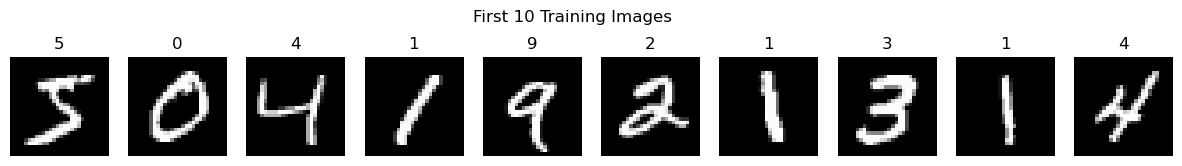

In [10]:
# Visualization 1: First 10 training images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"{y_train[i].argmax()}")
plt.suptitle("First 10 Training Images")
plt.show()

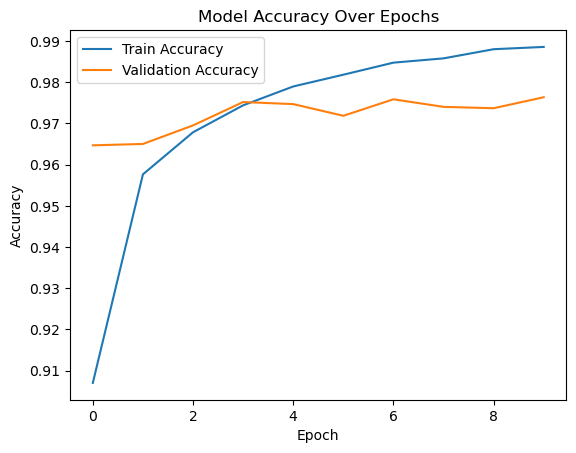

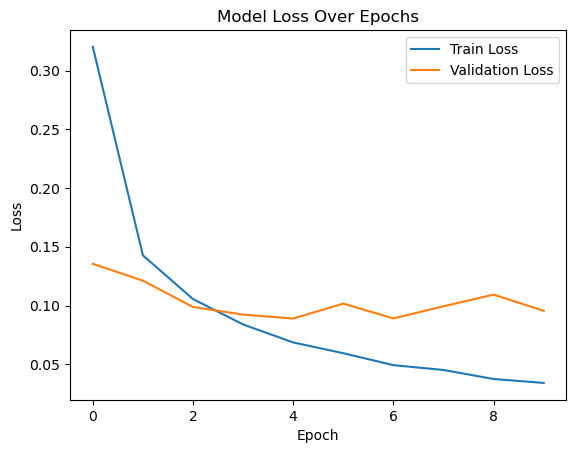

In [11]:
# 4. Train Model with history tracking

# Visualization 2: Accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualization 3: Loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()